# 목표
장르 탐색

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
# print(matplotlib.__file__)
import subprocess

mpl_file = matplotlib.__file__
mpl_file_loc = '/'.join(mpl_file.split('/')[:-1]) + '/mpl-data/fonts/ttf/'

# 폰트 복사

subprocess.run(f'cp /usr/share/fonts/truetype/nanum/Nanum* {mpl_file_loc}', shell=True)
print(mpl_file_loc)
subprocess.run('rm -rf ~/.cache/matplotlib/*', shell=True)
plt.rcParams["font.family"] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
# 커널 재시작

/home/innovation/codessey/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/


In [2]:
class MovieDataLoader:
    def __init__(self, file_path = '../data'):
        self.file_path = file_path
        self.__load_data()

    def __load_data(self):
        for file_name in os.listdir(self.file_path):
            self.file_name = []
            if file_name.endswith('.csv'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name)))
            if file_name.endswith('.txt'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name), sep='\t', engine='python'))



In [3]:
movie_data_loader = MovieDataLoader()
casting = movie_data_loader.castings
countries = movie_data_loader.countries
genres = movie_data_loader.genres
movies = movie_data_loader.movies
peoples = movie_data_loader.peoples
rates = movie_data_loader.rates

<Axes: title={'center': 'Genres bar plot'}, xlabel='genre', ylabel='count'>

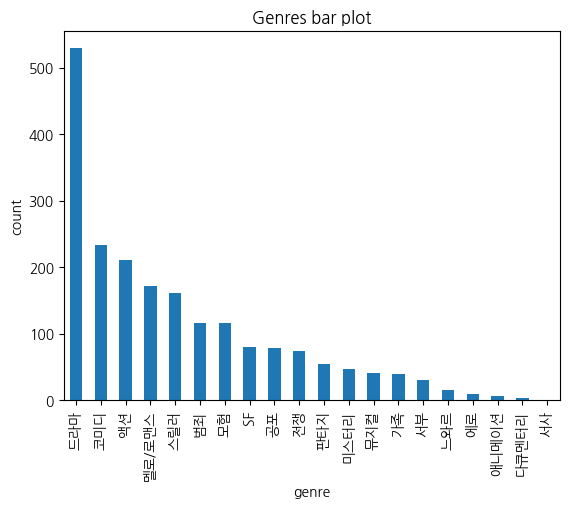

In [ ]:
## genres bar plot
genres.head()
plt.title('Genres bar plot')
plt.xlabel('genres')
plt.ylabel('count')
genres['genre'].value_counts().plot(kind='bar')

<Axes: xlabel='genre'>

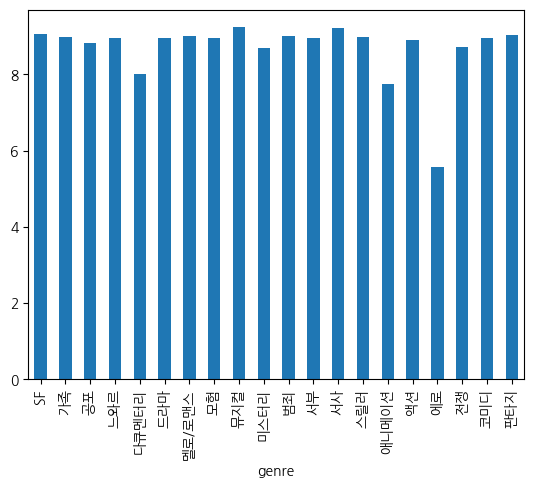

In [12]:
# 장르별 평점 분포

df = pd.merge(rates, movies, on='movie').merge(genres, on='movie')
df_grouped_by_genre = df.groupby('genre')['rate'].mean()
df_grouped_by_genre.plot(kind='bar')